In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


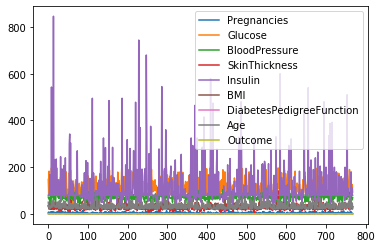

In [30]:
df.plot()

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

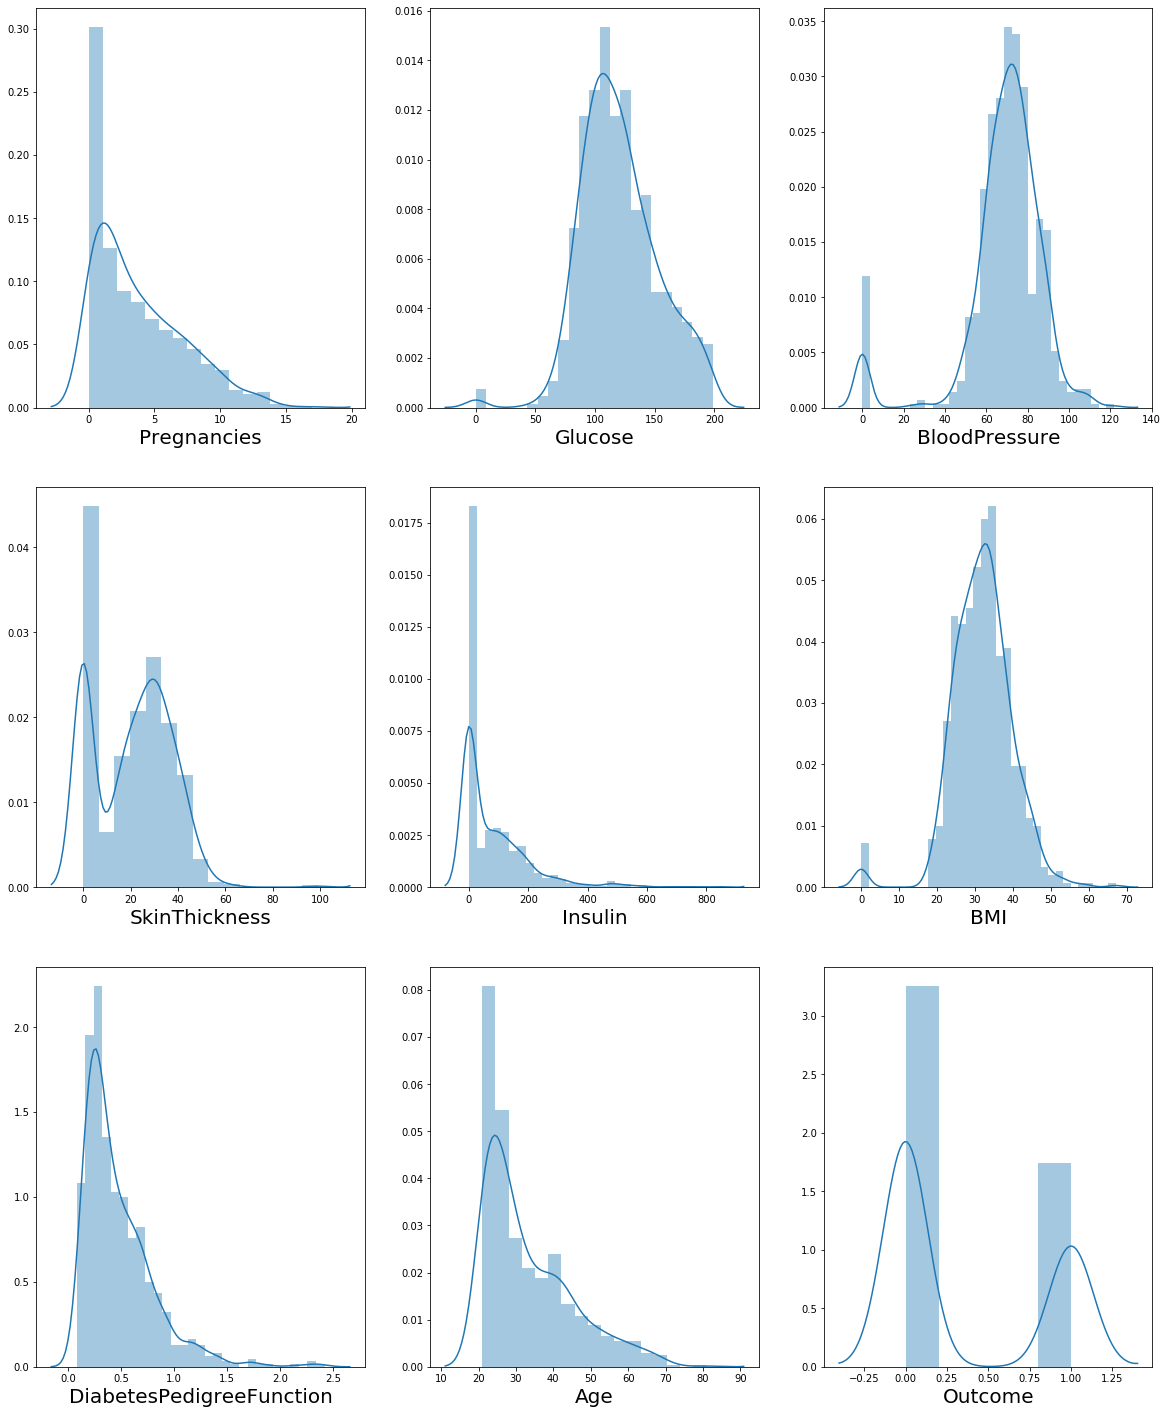

In [5]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#replace null values with mean 
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


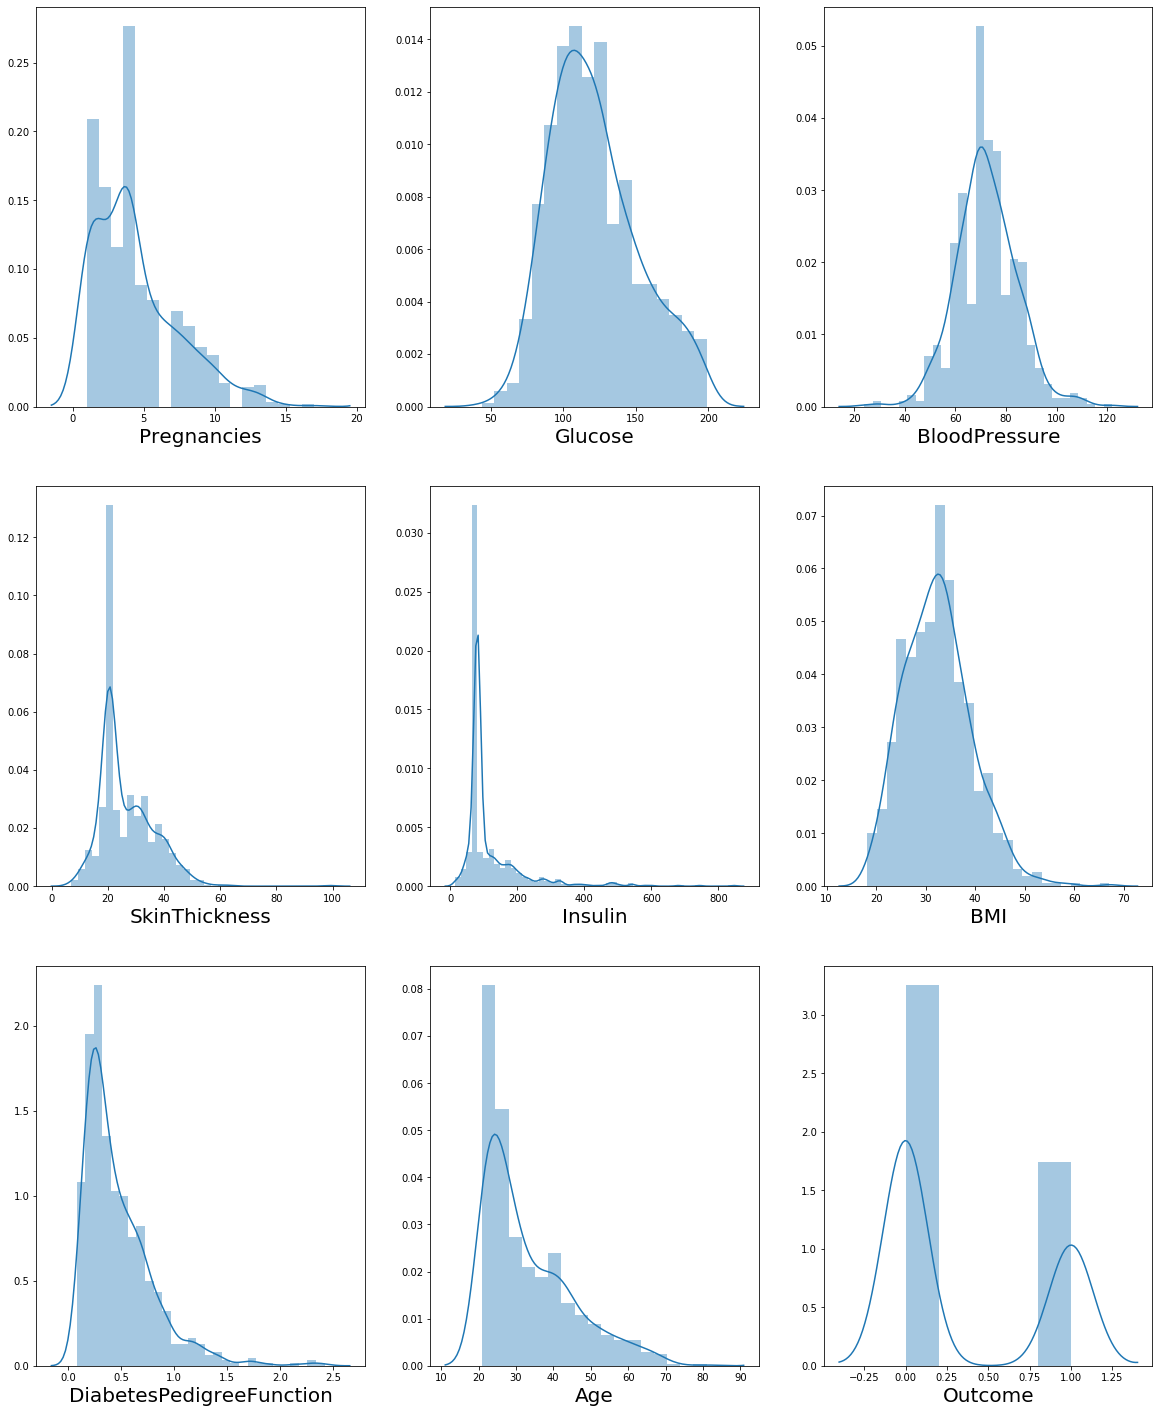

In [9]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column  in df:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [10]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']

In [ ]:
pd.crosstab(df.Age,df.BloodPressure).plot(kind="bar",figsize=(20,6))
plt.title('BP Frequency with respective Ages')
plt.xlabel('Age')
plt.ylabel('BP')
#plt.savefig('BP with repective Ages.png')
plt.show()

In [11]:
# plt.figure(figsize = (10,15),facecolor='white')
# plotnumber = 1
# for column in df:
#     if plotnumber <=9:
#         ax = plt.subplot(3,3,plotnumber)
#         sns.boxplot(df[column])
#         plt.xlabel(column,fontsize=20)
#     plotnumber += 1
# plt.show()

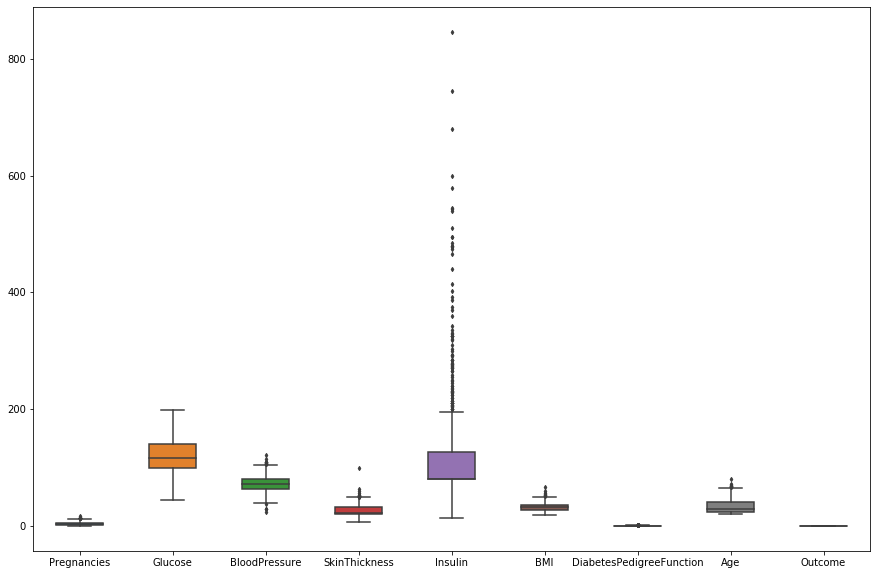

In [12]:
#finding outliers
fig,ax = plt.subplots(figsize=(15,10),facecolor='white')
sns.boxplot(data = df , ax = ax ,width = 0.5 , fliersize = 3)

In [13]:
#we are removing 2% of data from pregnencies
q = df["Pregnancies"].quantile(0.98)
data_cleaned = df[df['Pregnancies']<q]
#we are removing 3% of data from BloodPressure
q = df['BloodPressure'].quantile(0.97)
data_cleaned = df[df['BloodPressure']<q]
#we are removing 3% of data from SkinThickness
q = df['SkinThickness'].quantile(0.97)
data_cleaned = df[df['SkinThickness']<q]
#we are removing 6% of data from Insulin
q = df['Insulin'].quantile(0.94)
data_cleaned = df[df['Insulin']<q]
#we are removing 3% of data from BMI
q = df['BMI'].quantile(0.97)
data_cleaned = df[df['BMI']<q]
#we are removing 1% of data from DiabetesPedigreeFunction
q = df['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = df[df['DiabetesPedigreeFunction']<q]
#we are removing 2% of data from Age
q = df['Age'].quantile(0.98)
data_cleaned = df[df['Age']<q]


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

In [16]:
vif

,vif,Features
0,1.410013,Pregnancies
1,1.347415,Glucose
2,1.252549,BloodPressure
3,1.450493,SkinThickness
4,1.264171,Insulin
5,1.559203,BMI
6,1.056273,DiabetesPedigreeFunction
7,1.546208,Age


In [17]:
# creating a model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve , roc_auc_score , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.4,random_state=120)
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
accuracy_score(y_pred,y_test)


0.7435064935064936

In [51]:
lg.intercept_

array([-0.82942784])

In [19]:
#auc score
auc = roc_auc_score(y_test,y_pred)
auc

0.7055555555555556

In [20]:
#confusion matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[166,  32],
       [ 47,  63]], dtype=int64)

In [21]:
tp = confusion[0][0]
fp = confusion[0][1]
fn = confusion[1][0]
tn = confusion[1][1]

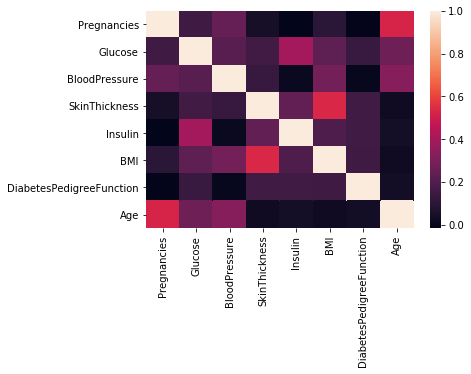

In [22]:
#correlation
sns.heatmap(X.corr())

array([[166,  32],
       [ 47,  63]], dtype=int64)

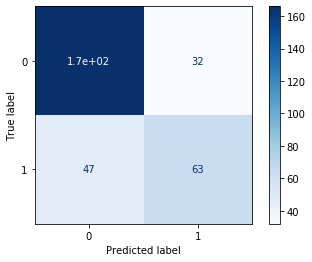

In [32]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(lg,X_test,y_test,cmap=plt.cm.Blues,normalize=None)
#disp = plot_confusion_matrix(lg,X_test,y_test,cmap='viridis',normalize=None)
disp.confusion_matrix

In [24]:
# finding accuracy 
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.7435064935064936

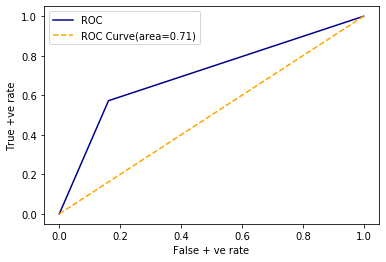

In [26]:
#plotting roc curve 
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color = 'darkblue',label = 'ROC')
plt.plot([0,1],[0,1],color='orange',linestyle='--',label="ROC Curve(area=%0.2f)"%auc)
plt.xlabel('False + ve rate')
plt.ylabel('True +ve rate')
plt.legend()
plt.show()